<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des Régions de Confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy d’un sous-problème de
régions de confiance (fichier `Pas_De_Cauchy.jl`). La spécification de cet algorithme est donnée ci-dessous.

In [1]:
using LinearAlgebra
using Documenter
using Markdown  
include("Pas_De_Cauchy.jl")
# @doc Pas_De_Cauchy

Pas_De_Cauchy

2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du Pas de Cauchy. Vous créerez pour cela un fichier `tester_pas_de_Cauchy.jl` dans le répertoire `test` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [2]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_pas_de_cauchy.jl")
include("../src/Pas_De_Cauchy.jl")

affiche = false

@testset "Test gct" begin
	tester_pas_de_cauchy(affiche,Pas_De_Cauchy)
end;

Test Summary: | Pass  Total  Time
Test gct      |    8      8  1.1s


3. Coder l'algorithme des Régions de Confiance (fichier `Regions_De_Confiance.jl`). Sa spécification est donnée ci-dessous.

In [3]:
include("Regions_De_Confiance.jl")
# @doc Regions_De_Confiance

Regions_De_Confiance

4. Vérifier que les tests ci-dessous passent.

In [4]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
affiche = false

@testset "Test rc avec cauchy" begin
	tester_regions_de_confiance(affiche,Regions_De_Confiance)
end;

iters = 864


Test Summary:       | Pass  Total  Time
Test rc avec cauchy |   30     30  2.3s


## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit $$ f_{1} : \mathbf{R}^3 \rightarrow \mathbf{R}$$ $$ (x_1,x_2, x_3) \mapsto  2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2$$ Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de Newton et RC-Pas de Cauchy sur cette fonction.

2.  Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

In [5]:
using LinearAlgebra
using Markdown                             # Pour que les docstrings en début des fonctions ne posent
                                           # pas de soucis. Ces docstrings sont utiles pour générer 
                                           # la documentation sous GitHub
include("Algorithme_De_Newton.jl")
include("Regions_De_Confiance.jl")
include("Pas_De_Cauchy.jl")
include("Gradient_Conjugue_Tronque.jl")

# Affichage les sorties de l'algorithme des Régions de confiance
function my_afficher_resultats(algo,nom_fct,point_init,xmin,fxmin,flag,sol_exacte,nbiters)
	println("-------------------------------------------------------------------------")
	printstyled("Résultats de : ",algo, " appliqué à ",nom_fct, " au point initial ", point_init, ":\n",bold=true,color=:blue)
	println("  * xsol = ",xmin)
	println("  * f(xsol) = ",fxmin)
	println("  * nb_iters = ",nbiters)
	println("  * flag = ",flag)
	println("  * sol_exacte : ", sol_exacte)
end


# Fonction f1
# -----------
f1(x) = 2 * (x[1] + x[2] + x[3] - 3) ^ 2 + (x[1] - x[2]) ^ 2 + (x[2] - x[3]) ^ 2
# la gradient de la fonction f0
grad_f1(x) = [4*(x[1]+x[2]+x[3]−3)+2*(x[1]−x[2]);4*(x[1]+x[2]+x[3]−3)-2*(x[1]−x[2])+2*(x[2]−x[3]);4*(x[1]+x[2]+x[3]−3)-2*(x[2]−x[3])]
# la hessienne de la fonction f0
hess_f1(x) = [6 2 4; 2 8 2; 4 2 6]
sol_exacte = [1 ,1 ,1]
options = []

x0 = [-1,100,100]
xmin,f_min,flag,nb_iters = Algorithme_De_Newton(f1,grad_f1,hess_f1,x0,options)
my_afficher_resultats("Newton","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)

xmin,f_min,flag,nb_iters = Regions_De_Confiance("cauchy",f1,grad_f1,hess_f1,x0,options)
my_afficher_resultats("RC-cauchy","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)

xmin,f_min,flag,nb_iters = Regions_De_Confiance("gct",f1,grad_f1,hess_f1,x0,options)
my_afficher_resultats("RC-gct","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)


-------------------------------------------------------------------------


Résultats de : Newton appliqué à f1 au point initial [-1, 10

0, 100]:
  * xsol = [1.0, 1.0, 1.0]
  * f(xsol) = 0.0
  * nb_iters = 1
  * flag = 0


  * sol_exacte : [1, 1, 1]


-------------------------------------------------------------------------
Résultats de : RC-cauchy appliqué à f1 au point initial [-1, 100, 100]:
  * xsol = [0.9999949028313507, 0.9999996556096755, 1.000004408606571]
  * f(xsol) = 4.731386262483046e-11
  * nb_iters = 45
  * flag = 2
  * sol_exacte : [1, 1, 1]


-------------------------------------------------------------------------
Résultats de : RC-gct appliqué à f1 au point initial [-1, 100, 100]:
  * xsol = [1.0, 1.0000000000000004, 1.0]
  * f(xsol) = 7.888609052210118e-31
  * nb_iters = 19
  * flag = 0
  * sol_exacte : [1, 1, 1]


tableau d'iteration pour des valeurs de delta croissante:

Any[86, 48, 46, 41, 45, 56, 40, 50, 48, 50]

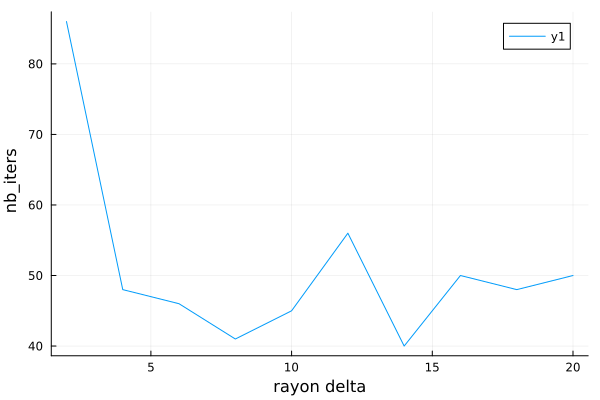

In [6]:
using LinearAlgebra
using Markdown                             # Pour que les docstrings en début des fonctions ne posent
using Plots
                                           # pas de soucis. Ces docstrings sont utiles pour générer 
                                           # la documentation sous GitHub
include("Regions_De_Confiance.jl")
include("Pas_De_Cauchy.jl")
include("Gradient_Conjugue_Tronque.jl")


# Fonction f1
# -----------
f1(x) = 2 * (x[1] + x[2] + x[3] - 3) ^ 2 + (x[1] - x[2]) ^ 2 + (x[2] - x[3]) ^ 2
# la gradient de la fonction f0
grad_f1(x) = [4*(x[1]+x[2]+x[3]−3)+2*(x[1]−x[2]);4*(x[1]+x[2]+x[3]−3)-2*(x[1]−x[2])+2*(x[2]−x[3]);4*(x[1]+x[2]+x[3]−3)-2*(x[2]−x[3])]
# la hessienne de la fonction f0
hess_f1(x) = [6 2 4; 2 8 2; 4 2 6]
sol_exacte = [1 ,1 ,1]

#L'influence du rayon
x0 = [-1,100,100]
iters=[]
for rayon in range(2,20,10)
   options= [rayon, 0.5, 2.00,0.25,0.75, 2,1000,sqrt(eps()), 1e-15, 1.e-2]
   xmin,f_min,flag,nb_iters = Regions_De_Confiance("cauchy",f1,grad_f1,hess_f1,x0,options)
   iters =vcat(iters,nb_iters)   
end
print("tableau d'iteration pour des valeurs de delta croissante:")
print(iters)
plot(range(2,20,10),iters)
xlabel!("rayon delta")
ylabel!(" nb_iters")


 tableau d'iteration pour des valeurs de gamma2 croissante:Any[86, 45, 46, 43, 44, 46, 44, 50, 56, 53]

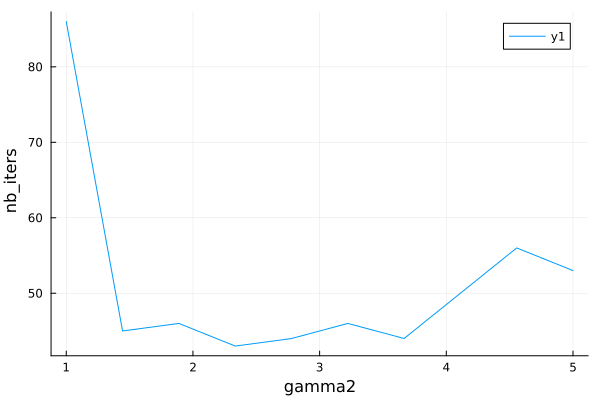

In [7]:
using LinearAlgebra
using Markdown                             # Pour que les docstrings en début des fonctions ne posent
using Plots
                                           # pas de soucis. Ces docstrings sont utiles pour générer 
                                           # la documentation sous GitHub
include("Regions_De_Confiance.jl")
include("Pas_De_Cauchy.jl")
include("Gradient_Conjugue_Tronque.jl")


# Fonction f1
# -----------
f1(x) = 2 * (x[1] + x[2] + x[3] - 3) ^ 2 + (x[1] - x[2]) ^ 2 + (x[2] - x[3]) ^ 2
# la gradient de la fonction f0
grad_f1(x) = [4*(x[1]+x[2]+x[3]−3)+2*(x[1]−x[2]);4*(x[1]+x[2]+x[3]−3)-2*(x[1]−x[2])+2*(x[2]−x[3]);4*(x[1]+x[2]+x[3]−3)-2*(x[2]−x[3])]
# la hessienne de la fonction f0
hess_f1(x) = [6 2 4; 2 8 2; 4 2 6]
sol_exacte = [1 ,1 ,1]
x0 = [-1,100,100]

#L'influence de gamma2

iters=[]
for gamma2 in range(1,5,10)
   options= [10, 0.5,gamma2,0.25,0.75, 2,1000,sqrt(eps()), 1e-15, 1.e-2]
   xmin,f_min,flag,nb_iters = Regions_De_Confiance("cauchy",f1,grad_f1,hess_f1,x0,options)
   iters =vcat(iters,nb_iters)   
end
print("\n tableau d'iteration pour des valeurs de gamma2 croissante:")
print(iters)
plot(range(1,5,10),iters)
xlabel!("gamma2")
ylabel!(" nb_iters")


 tableau d'iteration pour des valeurs de eta2 croissante:Any[45, 45, 45, 86, 86, 86, 86, 86, 86, 86]

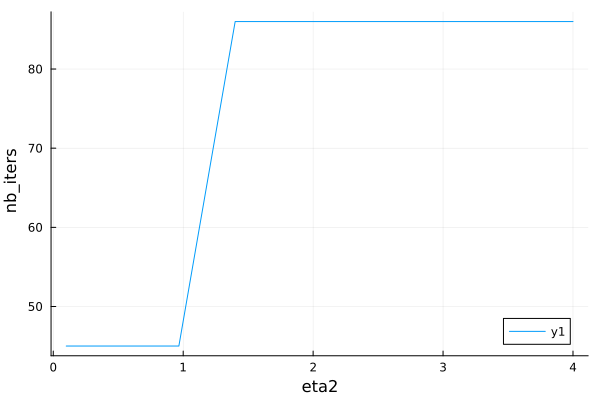

In [8]:
using LinearAlgebra
using Markdown                             # Pour que les docstrings en début des fonctions ne posent
using Plots
                                           # pas de soucis. Ces docstrings sont utiles pour générer 
                                           # la documentation sous GitHub
include("Regions_De_Confiance.jl")
include("Pas_De_Cauchy.jl")
include("Gradient_Conjugue_Tronque.jl")


# Fonction f1
# -----------
f1(x) = 2 * (x[1] + x[2] + x[3] - 3) ^ 2 + (x[1] - x[2]) ^ 2 + (x[2] - x[3]) ^ 2
# la gradient de la fonction f0
grad_f1(x) = [4*(x[1]+x[2]+x[3]−3)+2*(x[1]−x[2]);4*(x[1]+x[2]+x[3]−3)-2*(x[1]−x[2])+2*(x[2]−x[3]);4*(x[1]+x[2]+x[3]−3)-2*(x[2]−x[3])]
# la hessienne de la fonction f0
hess_f1(x) = [6 2 4; 2 8 2; 4 2 6]
sol_exacte = [1 ,1 ,1]

#L'influence de eta2
x0 = [-1,100,100]
iters=[]
for eta2 in range(0.1,4,10)
   options= [10, 0.5,2.00,0.25,eta2, 2,1000,sqrt(eps()), 1e-15, 1.e-2]
   xmin,f_min,flag,nb_iters = Regions_De_Confiance("cauchy",f1,grad_f1,hess_f1,x0,options)
   iters =vcat(iters,nb_iters)   
end
print("\n tableau d'iteration pour des valeurs de eta2 croissante:")
print(iters)
plot(range(0.1,4,10),iters)
#adding labels to plot
xlabel!("eta2")
ylabel!(" nb_iters")


Réponses:

1- f1 est une forme quadratique,d'où l'égalité entre f1 et son modèle de taylor d'ordre 2. Pour ce type de fonction
    l'algorithme de newton converge en une seule itération vers la solution exacte comme nous avons vu dans les 
    interprétations faites à la première partie. Tandis que l'algorithme de Region de confiance basé sur Pas de Cauchy ou
    Gradient conjugué peuvent prendre beaucoup du temps pour converger vers la solution exacte ce qui augmente le nombre
    d'itération, et c'est ce que nous constatons par les tests faits ci-dessus. Ce qui prouve la preformance de l'algorithme 
    de Newton par rapport à l'algortihme des regions de confiance pour les formes quadratiques.
    
 2- On peut jouer sur les paramètres : eta1, eta2, gamma2 , gamma1 , ainsi j'ai choisi d'étudier l'influence de eta2 et gamma2
  sur le nombre d'itération , les résultats sont donnés sous forme de graphes dans la cellule d'avant.

# Régions de confiance avec Gradient Conjugué
## Implémentation 

1. Implémenter l’algorithme du Gradient Conjugué Tronqué (fichier `Gradient_Conjugue_Tronque.jl`). Sa spécification est donnée ci-dessous.

In [9]:
include("Gradient_Conjugue_Tronque.jl")
# @doc Gradient_Conjugue_Tronque

Gradient_Conjugue_Tronque

2. Vérifier que les tests ci-dessous passent.

In [10]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_gct.jl")
include("../src/Gradient_Conjugue_Tronque.jl")

affiche = false

@testset "Test gct" begin
	tester_gct(affiche,Gradient_Conjugue_Tronque)
end;

Test Summary: | Pass  Total  Time
Test gct      |   11     11  0.2s


3. Intégrer l’algorithme du Gradient Conjugué Tronqué dans le code de régions de confiance (fichier `Regions_De_Confiance.jl`).

4. Décommenter les tests avec le gradient conjugué dans `tester_regions_de_confiance.jl` et vérifier que les tests passent.

In [11]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")

affiche = false

@testset "Test rc avec cauchy et gct" begin
	tester_regions_de_confiance(affiche,Regions_De_Confiance)
end;

iters = 864


Test Summary:              | Pass  Total  Time
Test rc avec cauchy et gct |   30     30  1.3s


## Interprétation  

1. Comparer la décroissance obtenue avec celle du pas de Cauchy, en imposant la sortie
dans l’algorithme au bout d’une itération seulement. Vous donnerez ci-après des résultats numériques. 
    1. Que remarquez vous ?
    2. Comparer la décroissance obtenue avec celle du pas de Cauchy dans le cas général.

3. Quels sont les avantages et inconvénients des deux approches ?

Réponses :

1- On calcule la décroissance du modèle en retournant dans la fonction Regions_De_Confiance le paramètre m(xk)-m(xk+sk).

Dans un premier temps, on fixe le nombre d'itération à une seule :
on teste avec la fonction fct2 avec le point initial :
x0 = [0,0] :
cauchy : 1.4894739160726336e-10    gct : 1.4894739166085143e-10
x0 = [0,9] :
cauchy : 3200.011599987736         gct : 3200.011599987738

Ainsi, on remarque que la décroissance du modèle en se basant sur gct est à peu près similaire à celle basée sur Cauchy.


Dans un deuxième temps,  on fixe le nombre d'itération aléatoirement (prenons par exemple 20)

on teste avec la fonction fct2 avec le point initial x0 = [1,10] :
Décroissance de Cauchy : [11806.644718999243, 190.72060683170386, 3.125219057998705, 0.0006348755401299755, 0.0006400699676927246, 0.0006399507374057478, 0.0006452541373649368, 0.0006451331880441558, 0.0006505492706692095, 0.0006504265550475452, 0.0006559592066377462, 0.0006558346755474176, 0.0006614879691051456, 0.0006613615713808585, 0.0006671397781738975, 0.0006670114605391575, 0.0006729190625494041, 0.000672788769507271, 0.0006788304728768679, 0.0006786981465847219]

Décroissance de GCT [11806.644718999243, 270.7907778468657, 46.667148897954654, 2.435240507470662, 1.3081656956767054, 0.9260079763109639, 1.0222423993747487, 0.9071709518121716, 0.5772421589908467, 0.6022483303610615, 0.8722233212308392, 0.8731097903357026, 0.777949120090087, 0.49012844635983654, 0.3270476623899552, 0.2826055890915664, 0.3104449217966936, 0.2770690666449198, 0.2770690666449198, 0.2770690666449198, 0.2770046367136758, 0.2075958530808193, 0.13687813319209818, 0.10785349876666617, 0.13688067180092323, 0.06658580981518514, 0.06658580981518514, 0.06658580981518514, 0.06658580981518514, 0.05089889908883263, 0.025271335174305104, 0.012103940593471058, 0.005953078116108332, 0.0008082727308077633, 5.750555651663265e-5, 9.09939009896265e-8, 8.583169835861043e-13]

On remarque ainsi que la décroissance de GCT est bien plus importante que celle de Cauchy


2 - L'algorithme des régions de confiance basée sur le pas de cauchy bien qu'il converge rapidement, sa décroissance est faible comparé à celle du gradient conjugué tronqué, ainsi,il s’agit de faire un compromis entre le coût et le nombre d’itérations.

In [12]:
using LinearAlgebra
using Markdown                             # Pour que les docstrings en début des fonctions ne posent
using Plots
                                           # pas de soucis. Ces docstrings sont utiles pour générer 
                                           # la documentation sous GitHub
include("Regions_De_Confiance.jl")
include("Pas_De_Cauchy.jl")
include("Gradient_Conjugue_Tronque.jl")


f2(x) = 100 * (x[2] - x[1] ^ 2) ^ 2 + (1 - x[1]) ^ 2
grad_f2(x) = [-400 * x[1] * (x[2] - x[1] ^ 2) - 2 * (1 - x[1]) ; 200 * (x[2] -x[1]^2)]
hess_f2(x) = [(-400*(x[2]-3*x[1]^2)+2) -(400*x[1]);
              (-400*x[1]) 200]
sol_exacte = [1,1]

x0 = [0,10]

#options= [10, 0.5,2.00,0.25,0.75, 2,10,sqrt(eps()), 1e-15, 1.e-2]
#decroissance,xmin,f_min,flag,nb_iters = Regions_De_Confiance("cauchy",f2,grad_f2,hess_f2,x0,options)
#print(decroissance)  
#decroissance1,xmin,f_min,flag,nb_iters = Regions_De_Confiance("gct",f2,grad_f2,hess_f2,x0,options)
#print("\n")
#print(decroissance1)

2-element Vector{Int64}:
  0
 10